<a href="https://colab.research.google.com/github/Burhan2409/Machine_learning_Algo/blob/main/Kmeans_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris




In [56]:
iris = load_iris()

In [57]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [58]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [59]:
data = pd.DataFrame(iris.data , columns= iris.feature_names )
data['target'] = iris.target
data.drop(['sepal width (cm)','sepal length (cm)' ], axis=1)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


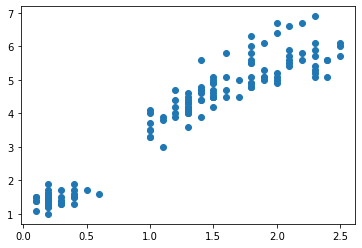

In [60]:
plt.scatter(data['petal width (cm)'] , data['petal length (cm)'])
plt.show()

In [61]:
# km = KMeans(n_clusters=2)
# y_predicted = km.fit_predict(data[['petal length (cm)','petal width (cm)']])
# y_predicted

In [62]:
# np.unique(y_predicted)

In [63]:
# data['target_pred'] = y_predicted

In [64]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
# df0 = data[data['target_pred']==0]
# df1 = data[data['target_pred']==1]

# plt.scatter(df0['petal length (cm)'] , df0['petal width (cm)'] , color="black")
# plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color="red")

# plt.xlabel("lenght")
# plt.ylabel("width")
# plt.legend()

In [66]:
scaler = MinMaxScaler()
scaler.fit(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])

scaler.fit(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])


In [73]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data[['petal length (cm)','petal width (cm)']])

data['target_pred'] = y_predicted

In [74]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

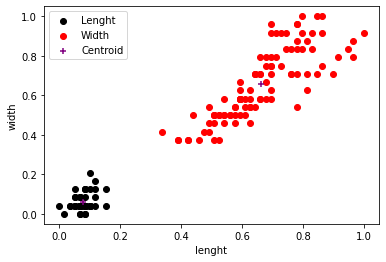

In [77]:
df0 = data[data['target_pred']==0]
df1 = data[data['target_pred']==1]

plt.scatter(df0['petal length (cm)'] , df0['petal width (cm)'] , color="black",label="Lenght")
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color="red",label="Width")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="+",label="Centroid")

plt.xlabel("lenght")
plt.ylabel("width")
plt.legend()
plt.show()

In [78]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(data[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

sse


[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667124,
 0.8538617353912241,
 0.6803604930647138,
 0.5651273455703979,
 0.4861789349342511,
 0.41611920411898795]

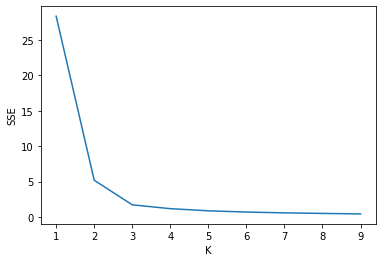

In [80]:
plt.xlabel("K")
plt.ylabel('SSE')
plt.plot(k_rng,sse)